In [24]:
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import medical_lib as ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

Einlesen der Daten

In [25]:
medDatamodel3 = pd.read_csv('naive_latest_todesinterval_model5.csv')
medDataCopy_model3 = medDatamodel3.copy()
medDataCopy_model3 = medDataCopy_model3.iloc[:, 3:]

med_class_model3 = medDataCopy_model3.iloc[:, -1]
med_features_model3 = medDataCopy_model3.iloc[:, :-1]
# Aufteilen der Daten in 4 Untersets
med_features_train_model3, med_features_test_model3, med_class_train_model3, med_class_test_model3 = train_test_split(med_features_model3, med_class_model3, test_size=0.2, random_state=43, stratify=med_class_model3)
med_class_test_array = np.array(med_class_test_model3)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN: Training

In [26]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model3,med_class_train_model3)

KNeighborsClassifier(n_neighbors=4)

KNN: Prediction

In [27]:
knnYpred = medKNN.predict(med_features_test_model3)
accuracyKNN = accuracy_score(med_class_test_model3, knnYpred)
precisionKNN = precision_score(med_class_test_model3, knnYpred, average='weighted')
recallKNN = recall_score(med_class_test_model3, knnYpred, average='weighted')
f1scoreKNN = f1_score(med_class_test_model3, knnYpred, average='weighted')
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
# index = result.index[result['Modellierung'] == 'Model_5'].tolist()
# result.at[index, 'KNN_precision'] = precisionknn
# result.at[index, 'KNN_recall'] = recallknn
# result.at[index, 'KNN_f1'] = f1scoreknn
# result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.43478260869565216 KNN Precision:  0.4175724637681159 KNN Recall:  0.43478260869565216 KNN F1-Score:  0.42599444958371885
Tatsächlich:  0.8043478260869565 0.8181818181818182 0.782608695652174 0.8
Durchschnittliche Abweichung:  0.9782608695652174
Standartabweichung der Abweichung:  1.0527217402437612


Logistic Regression: Training

In [28]:
lr_model = LogisticRegression()
lr_model.fit(med_features_train_model3,med_class_train_model3)

LogisticRegression()

Logistic Regression: Prediction

In [29]:
lr_y_pred = lr_model.predict(med_features_test_model3)
lr_accuracyLogReg = accuracy_score(med_class_test_model3, lr_y_pred)
lr_precisionLogReg = precision_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_recallLogReg = recall_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_f1scoreLogReg = f1_score(med_class_test_model3, lr_y_pred, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
# index = result.index[result['Modellierung'] == 'Model_5'].tolist()
# result.at[index, 'Logistic_Regression_precision'] = precisionlr
# result.at[index, 'Logistic_Regression_recall'] = recalllr
# result.at[index, 'Logistic_Regression_f1'] = f1scorelr
# result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.5434782608695652 Log-Regression Precision:  0.46471966037183426 Log-Regression Recall:  0.5434782608695652 Log-Regression F1-Score:  0.5008695652173913
Tatsächlich:  0.8695652173913043 0.9473684210526315 0.782608695652174 0.8571428571428571
Durchschnittliche Abweichung:  0.717391304347826
Standartabweichung der Abweichung:  0.9478360589822452


Decision Tree: Training

In [30]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(med_features_train_model3,med_class_train_model3)

Decision Tree: Prediction

In [31]:
decTree_pred = medical_DecTree.predict(med_features_test_model3)
accuracyDecTree = accuracy_score(med_class_test_model3, decTree_pred)
precisionDecTree = precision_score(med_class_test_model3, decTree_pred, average='weighted')
recallDecTree = recall_score(med_class_test_model3, decTree_pred, average='weighted')
f1scoreDecTree = f1_score(med_class_test_model3, decTree_pred, average='weighted')
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
# index = result.index[result['Modellierung'] == 'Model_5'].tolist()
# result.at[index, 'Decision_Tree_precision'] = precisiondc
# result.at[index, 'Decision_Tree_recall'] = recalldc
# result.at[index, 'Decision_Tree_f1'] = f1scoredc
# result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.5434782608695652 DecTree Precision:  0.5137601528905876 DecTree Recall:  0.5434782608695652 DecTree F1-Score:  0.5206904896345891
Tatsächlich:  0.8913043478260869 0.95 0.8260869565217391 0.8837209302325583
Durchschnittliche Abweichung:  0.8260869565217391
Standartabweichung der Abweichung:  1.0694238153259865


Random Forest: Training

In [32]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(med_features_train_model3,med_class_train_model3)

RandomForestClassifier(random_state=43)

Random Forest: Prediction

In [33]:
rfPred = medical_RF.predict(med_features_test_model3)
accuracyRF = accuracy_score(med_class_test_model3, rfPred)
precisionRF = precision_score(med_class_test_model3, rfPred, average='weighted')
recallRF = recall_score(med_class_test_model3, rfPred, average='weighted')
f1scoreRF = f1_score(med_class_test_model3, rfPred, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
# index = result.index[result['Modellierung'] == 'Model_5'].tolist()
# result.at[index, 'Random_Forest_precision'] = precisionrf
# result.at[index, 'Random_Forest_recall'] = recallrf
# result.at[index, 'Random_Forest_f1'] = f1scorerf
# result.to_csv('automated_algorithmen.csv')


Anzahl Estimator: 100  RF Accuracy:  0.6739130434782609 RF Precision:  0.669705753184014 RF Recall:  0.6739130434782609 RF F1-Score:  0.6498188405797102
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.41304347826086957
Standartabweichung der Abweichung:  0.678107563499227


ADABoost: Training

In [34]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model3,med_class_train_model3)

AdaBoostClassifier()

ADABoost: Prediction

In [35]:
adamodel_prediction = adamodel.predict(med_features_test_model3)
adamodel_accuracy = accuracy_score(med_class_test_model3, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model3, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
# index = result.index[result['Modellierung'] == 'Model_5'].tolist()
# result.at[index, 'ADABoost_precision'] = precisionada
# result.at[index, 'ADABoost_recall'] = recallada
# result.at[index, 'ADABoost_f1'] = f1scoreada
# result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.6086956521739131 Precision:  0.6494565217391305 Recall:  0.6086956521739131 f1-Score:  0.6050021958717611
Tatsächlich:  0.9565217391304348 0.92 1.0 0.9583333333333334
Durchschnittliche Abweichung:  0.5869565217391305
Standartabweichung der Abweichung:  0.8229344882933783


XGBoost: Training

In [36]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(med_features_train_model3,med_class_train_model3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

XGBoost: Prediction

In [37]:
xgboosted_prediction = xgmodel.predict(med_features_test_model3)
xgboosted_accuracy = accuracy_score(med_class_test_model3, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model3, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
# index = result.index[result['Modellierung'] == 'Model_5'].tolist()
# result.at[index, 'XGBoost_precision'] = precisionxg
# result.at[index, 'XGBoost_recall'] = recallxg
# result.at[index, 'XGBoost_f1'] = f1scorexg
# result.to_csv('automated_algorithmen.csv')


XGBOOST:  Accuracy:  0.6739130434782609 Precision:  0.6143478260869565 Recall:  0.6739130434782609 F1-Score:  0.641570758738278
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.45652173913043476
Standartabweichung der Abweichung:  0.7432748259686417
#################################################################################################


XGBoost: Feature-Selection

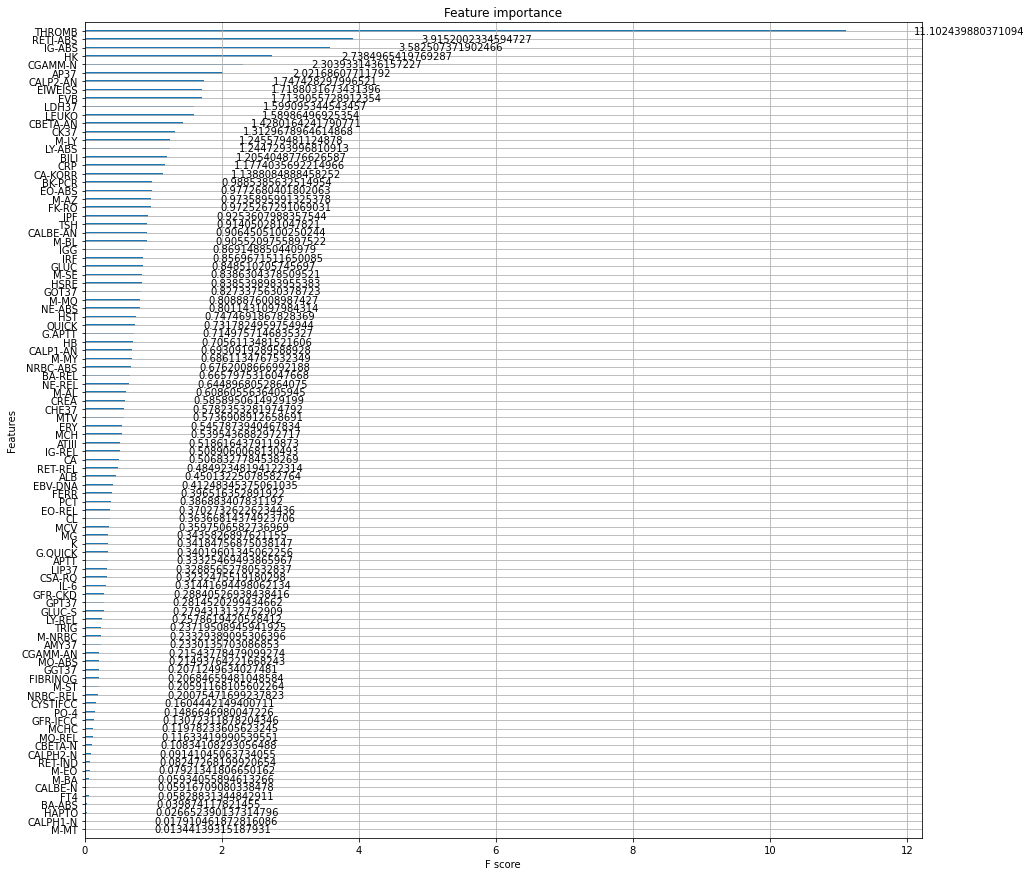

In [38]:
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type = 'gain').items())
pyplot.rcParams['figure.figsize'] = [15,15]
newfeatures = []
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()

Feature-Selection

In [39]:
newfeatures = []
for i in range(len(featureranking)):
    if featureranking[i][0] < 1.0:
        newfeatures.append(featureranking[i][1])

for el in newfeatures:
    medDataCopy_model3.drop(el, inplace=True, axis=1)
medDataCopy_model3.to_csv('naive_latest_todesinterval_model5_selection.csv')

Nach Feature-Selection: Einlesen der Daten

In [40]:
medDatamodel3 = pd.read_csv('naive_latest_todesinterval_model5_selection.csv')
medDataCopy_model3 = medDatamodel3.copy()
medDataCopy_model3 = medDataCopy_model3.iloc[:, 3:]

med_class_model3 = medDataCopy_model3.iloc[:, -1]
med_features_model3 = medDataCopy_model3.iloc[:, :-1]
# Aufteilen der Daten in 4 Untersets
med_features_train_model3, med_features_test_model3, med_class_train_model3, med_class_test_model3 = train_test_split(med_features_model3, med_class_model3, test_size=0.2, random_state=43, stratify=med_class_model3)
med_class_test_array = np.array(med_class_test_model3)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [41]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model3,med_class_train_model3)
knnYpred = medKNN.predict(med_features_test_model3)
accuracyKNN = accuracy_score(med_class_test_model3, knnYpred)
precisionKNN = precision_score(med_class_test_model3, knnYpred, average='weighted')
recallKNN = recall_score(med_class_test_model3, knnYpred, average='weighted')
f1scoreKNN = f1_score(med_class_test_model3, knnYpred, average='weighted')
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
# index = result.index[result['Modellierung'] == 'Model_5_selected'].tolist()
# result.at[index, 'KNN_precision'] = precisionknn
# result.at[index, 'KNN_recall'] = recallknn
# result.at[index, 'KNN_f1'] = f1scoreknn
# result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.6304347826086957 KNN Precision:  0.5649626701800614 KNN Recall:  0.6304347826086957 KNN F1-Score:  0.5954710144927536
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.5217391304347826
Standartabweichung der Abweichung:  0.8531050813195036


Logistic Regression:

In [42]:
lr_model = LogisticRegression()
lr_model.fit(med_features_train_model3,med_class_train_model3)
lr_y_pred = lr_model.predict(med_features_test_model3)
lr_accuracyLogReg = accuracy_score(med_class_test_model3, lr_y_pred)
lr_precisionLogReg = precision_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_recallLogReg = recall_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_f1scoreLogReg = f1_score(med_class_test_model3, lr_y_pred, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
# index = result.index[result['Modellierung'] == 'Model_5_selected'].tolist()
# result.at[index, 'Logistic_Regression_precision'] = precisionlr
# result.at[index, 'Logistic_Regression_recall'] = recalllr
# result.at[index, 'Logistic_Regression_f1'] = f1scorelr
# result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.717391304347826 Log-Regression Precision:  0.6450241545893719 Log-Regression Recall:  0.717391304347826 Log-Regression F1-Score:  0.6788234172387491
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.4782608695652174
Standartabweichung der Abweichung:  0.8782178207271374


Decision Tree

In [43]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(med_features_train_model3,med_class_train_model3)
decTree_pred = medical_DecTree.predict(med_features_test_model3)
accuracyDecTree = accuracy_score(med_class_test_model3, decTree_pred)
precisionDecTree = precision_score(med_class_test_model3, decTree_pred, average='weighted')
recallDecTree = recall_score(med_class_test_model3, decTree_pred, average='weighted')
f1scoreDecTree = f1_score(med_class_test_model3, decTree_pred, average='weighted')
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
# index = result.index[result['Modellierung'] == 'Model_5_selected'].tolist()
# result.at[index, 'Decision_Tree_precision'] = precisiondc
# result.at[index, 'Decision_Tree_recall'] = recalldc
# result.at[index, 'Decision_Tree_f1'] = f1scoredc
# result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.6304347826086957 DecTree Precision:  0.5752508361204013 DecTree Recall:  0.6304347826086957 DecTree F1-Score:  0.601153504880213
Tatsächlich:  0.8913043478260869 0.95 0.8260869565217391 0.8837209302325583
Durchschnittliche Abweichung:  0.6304347826086957
Standartabweichung der Abweichung:  1.0077675640434138


Random Forest

In [44]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(med_features_train_model3,med_class_train_model3)
rfPred = medical_RF.predict(med_features_test_model3)
accuracyRF = accuracy_score(med_class_test_model3, rfPred)
precisionRF = precision_score(med_class_test_model3, rfPred, average='weighted')
recallRF = recall_score(med_class_test_model3, rfPred, average='weighted')
f1scoreRF = f1_score(med_class_test_model3, rfPred, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
# index = result.index[result['Modellierung'] == 'Model_5_selected'].tolist()
# result.at[index, 'Random_Forest_precision'] = precisionrf
# result.at[index, 'Random_Forest_recall'] = recallrf
# result.at[index, 'Random_Forest_f1'] = f1scorerf
# result.to_csv('automated_algorithmen.csv')


Anzahl Estimator: 100  RF Accuracy:  0.6521739130434783 RF Precision:  0.6556521739130435 RF Recall:  0.6521739130434783 RF F1-Score:  0.6321347646610131
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.4782608695652174
Standartabweichung der Abweichung:  0.7442279464618996


ADABoost

In [45]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model3,med_class_train_model3)
adamodel_prediction = adamodel.predict(med_features_test_model3)
adamodel_accuracy = accuracy_score(med_class_test_model3, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model3, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
# index = result.index[result['Modellierung'] == 'Model_5_selected'].tolist()
# result.at[index, 'ADABoost_precision'] = precisionada
# result.at[index, 'ADABoost_recall'] = recallada
# result.at[index, 'ADABoost_f1'] = f1scoreada
# result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.5217391304347826 Precision:  0.5921548329476718 Recall:  0.5217391304347826 f1-Score:  0.5427352446964923
Tatsächlich:  0.8260869565217391 0.7586206896551724 0.9565217391304348 0.8461538461538461
Durchschnittliche Abweichung:  0.8260869565217391
Standartabweichung der Abweichung:  0.9624323313555937


XGBoost

In [46]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(med_features_train_model3,med_class_train_model3)
xgboosted_prediction = xgmodel.predict(med_features_test_model3)
xgboosted_accuracy = accuracy_score(med_class_test_model3, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model3, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
# index = result.index[result['Modellierung'] == 'Model_5_selected'].tolist()
# result.at[index, 'XGBoost_precision'] = precisionxg
# result.at[index, 'XGBoost_recall'] = recallxg
# result.at[index, 'XGBoost_f1'] = f1scorexg
# result.to_csv('automated_algorithmen.csv')


XGBOOST:  Accuracy:  0.6304347826086957 Precision:  0.5999868247694335 Recall:  0.6304347826086957 F1-Score:  0.6098244147157191
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.5217391304347826
Standartabweichung der Abweichung:  0.800519679979216
#################################################################################################
